In [1]:
# Import libraries
import numpy as np
import matplotlib
import pandas as pd
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import (
    RandomizedSearchCV,
    GridSearchCV,
    StratifiedKFold,
    cross_val_score,
    train_test_split
)
from sklearn import tree
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    classification_report
)

from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
file_path= input('Input dataset file path here:')

Input dataset file path here:/Users/Beiqi Wang/Downloads/Airline_review.csv


## **STEP 1: EXPLORATORY DATA ANALYSIS (EDA)**

In [11]:

# Import Airline Reviews csv dataset as a dataframe
airline_reviews = pd.read_csv(file_path)
airline_reviews.drop('Unnamed: 0', axis=1, inplace=True)

print('airline_reviews shape:')
display(airline_reviews.shape)

print('airline_reviews head:')
display(airline_reviews.head())

print('airline_reviews unique value count:')
display(airline_reviews.nunique())

print('airline_reviews null value count:')
display(airline_reviews.isnull().sum())

print('airline_reviews rows w/ null value count:')
display(airline_reviews.isna().any(axis=1))

print('airline_reviews data types:')
display(airline_reviews.dtypes)

print(f"Class Distribution: {airline_reviews['Recommended'].value_counts()}")

FileNotFoundError: [Errno 2] No such file or directory: '/Users/Beiqi Wang/Downloads/Airline_review.csv'

In [ ]:
df = airline_reviews.copy()
df.head()

,Airline Name,Overall_Rating,Review_Title,Review Date,Verified,Review,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money,Recommended
0,AB Aviation,9,"""pretty decent airline""",11th November 2019,True,Moroni to Moheli. Turned out to be a pretty ...,NaN,Solo Leisure,Economy Class,Moroni to Moheli,November 2019,4.0,5.0,4.0,4.0,NaN,NaN,3.0,yes
1,AB Aviation,1,"""Not a good airline""",25th June 2019,True,Moroni to Anjouan. It is a very small airline...,E120,Solo Leisure,Economy Class,Moroni to Anjouan,June 2019,2.0,2.0,1.0,1.0,NaN,NaN,2.0,no
2,AB Aviation,1,"""flight was fortunately short""",25th June 2019,True,Anjouan to Dzaoudzi. A very small airline an...,Embraer E120,Solo Leisure,Economy Class,Anjouan to Dzaoudzi,June 2019,2.0,1.0,1.0,1.0,NaN,NaN,2.0,no
3,Adria Airways,1,"""I will never fly again with Adria""",28th September 2019,False,Please do a favor yourself and do not fly wi...,NaN,Solo Leisure,Economy Class,Frankfurt to Pristina,September 2019,1.0,1.0,NaN,1.0,NaN,NaN,1.0,no
4,Adria Airways,1,"""it ruined our last days of holidays""",24th September 2019,True,Do not book a flight with this airline! My fr...,NaN,Couple Leisure,Economy Class,Sofia to Amsterdam via Ljubljana,September 2019,1.0,1.0,1.0,1.0,1.0,1.0,1.0,no


**Key Columns Descriptions:**
*   Airline Name: Name of the airline.
*   Overall_Rating: General rating given to the airline.
*   Review_Title: Title of the review.
*   Review Date: Date the review was posted.
*   Verified: Whether the review is verified.
*   Review: Text of the review.
*   Aircraft: Aircraft type (sparse data).
*   Type Of Traveller: E.g., solo leisure, business.
*   Seat Type: Cabin type (e.g., Economy, Business).
*   Route: Flight route (origin-destination pair).
*   Date Flown: When the flight occurred.
*   Ratings (various aspects, on a scale of 1.0 - 5.0):
  *   Seat Comfort
  *   Cabin Staff Service
  *   Food & Beverages
  *   Ground Service
  *   Inflight Entertainment
  *   Wifi & Connectivity
  *   Value For Money
*   Recommended: Whether the reviewer recommends the airline.


## **MODEL 1.9: DECISION TREE BENCHMARK W/ MOST MINIMAL PREPROCESSING**

In [ ]:
airline_reviews_dtbm = pd.read_csv(file_path)
airline_reviews_dtbm.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
"""
1. Drop all unnecessary columns
These are columns that are either
  a) invalid in the problem analysis context
  b) contain insights that wouldn't have an influence on the customers' Recommendation
  c) contain string/text-based insights (since we aren't using NLP or text analysis)
  d) time-sensitive (since we aren't using a time-series model)

Since inplace=True we only need to run these once
"""

airline_reviews_dtbm.drop('Airline Name', axis=1, inplace=True)
airline_reviews_dtbm.drop('Overall_Rating', axis=1, inplace=True)
airline_reviews_dtbm.drop('Review_Title', axis=1, inplace=True)
airline_reviews_dtbm.drop('Review Date', axis=1, inplace=True)
airline_reviews_dtbm.drop('Review', axis=1, inplace=True)
airline_reviews_dtbm.drop('Aircraft', axis=1, inplace=True)
airline_reviews_dtbm.drop('Route', axis=1, inplace=True)
airline_reviews_dtbm.drop('Date Flown', axis=1, inplace=True)
# airline_reviews_dtbm.drop('Verified', axis = 1, inplace = True)

In [ ]:
# """
# 2. Transform null values if applicable
# Many reviews will have null values in rating columns where the reviewer may
# have just felt neutral (e.g. Wifi & Connectivity, Inflight Entertainment, etc)

# If there is a null rating, just set it to "3.0")
# """

# airline_reviews_dtbm['Seat Comfort'].fillna(3.0, inplace=True)
# airline_reviews_dtbm['Cabin Staff Service'].fillna(3.0, inplace=True)
# airline_reviews_dtbm['Food & Beverages'].fillna(3.0, inplace=True)
# airline_reviews_dtbm['Ground Service'].fillna(3.0, inplace=True)
# airline_reviews_dtbm['Inflight Entertainment'].fillna(3.0, inplace=True)
# airline_reviews_dtbm['Wifi & Connectivity'].fillna(3.0, inplace=True)

In [ ]:
# """
# 3. Drop all rows with null values
# """

# airline_reviews_dtbm.dropna(inplace=True)
# airline_reviews_dtbm.reset_index(inplace=True)

In [ ]:
"""
Transform the values in 'Type Of Traveller' column as:
'Solo Leisure': 0
'Couple Leisure': 1
'Business': 2
'Family Leisure': 3

Transform the values in 'Seat Type' column as:
'Economy Class': 0
'Business Class': 1
'Premium Economy': 2
'First Class': 3

"""
# airline_reviews_dtbm = airline_reviews.copy()
airline_reviews_dtbm['Type Of Traveller'] = airline_reviews_dtbm['Type Of Traveller'].map({
    'Solo Leisure': 0.0,
    'Couple Leisure': 1.0,
    'Business': 2.0,
    'Family Leisure': 3.0
})

airline_reviews_dtbm['Seat Type'] = airline_reviews_dtbm['Seat Type'].map({
    'Economy Class': 0.0,
    'Business Class': 1.0,
    'Premium Economy': 2.0,
    'First Class': 3.0
})

In [ ]:
"""
5. Transform values in Recommended column as yes = 1 and no = 0

Setting these to binary values will make training our model easier.
"""

airline_reviews_dtbm['Recommended'] = airline_reviews_dtbm['Recommended'].map({'yes': 1, 'no': 0})

In [ ]:
"""
Evaluating post-processed dataset.
"""
# airline_reviews_rfbm.drop('index', axis=1, inplace=True)
airline_reviews_dtbm.reset_index()

print('airline_reviews shape:')
display(airline_reviews_dtbm.shape)

print('airline_reviews head:')
display(airline_reviews_dtbm.head())

print('airline_reviews unique value count:')
display(airline_reviews_dtbm.nunique())

print('airline_reviews null value count:')
display(airline_reviews_dtbm.isnull().sum())

print('airline_reviews rows w/ null value count:')
display(airline_reviews_dtbm.isna().any(axis=1))

print('airline_reviews data types:')
display(airline_reviews_dtbm.dtypes)

print(f"Class Distribution: {airline_reviews_dtbm['Recommended'].value_counts() / len(airline_reviews_dtbm['Recommended'])}")

airline_reviews shape:


(23171, 11)

airline_reviews head:


,Verified,Type Of Traveller,Seat Type,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money,Recommended
0,True,0.0,0.0,4.0,5.0,4.0,4.0,NaN,NaN,3.0,1
1,True,0.0,0.0,2.0,2.0,1.0,1.0,NaN,NaN,2.0,0
2,True,0.0,0.0,2.0,1.0,1.0,1.0,NaN,NaN,2.0,0
3,False,0.0,0.0,1.0,1.0,NaN,1.0,NaN,NaN,1.0,0
4,True,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0


airline_reviews unique value count:


,0
Verified,2
Type Of Traveller,4
Seat Type,4
Seat Comfort,6
Cabin Staff Service,6
Food & Beverages,6
Ground Service,5
Inflight Entertainment,6
Wifi & Connectivity,6
Value For Money,6


airline_reviews null value count:


,0
Verified,0
Type Of Traveller,3738
Seat Type,1096
Seat Comfort,4155
Cabin Staff Service,4260
Food & Beverages,8671
Ground Service,4793
Inflight Entertainment,12342
Wifi & Connectivity,17251
Value For Money,1066


airline_reviews rows w/ null value count:


,0
0,True
1,True
2,True
3,True
4,False
...,...
23166,True
23167,True
23168,True
23169,False


airline_reviews data types:


,0
Verified,bool
Type Of Traveller,float64
Seat Type,float64
Seat Comfort,float64
Cabin Staff Service,float64
Food & Beverages,float64
Ground Service,float64
Inflight Entertainment,float64
Wifi & Connectivity,float64
Value For Money,float64


Class Distribution: Recommended
0    0.66307
1    0.33693
Name: count, dtype: float64


In [ ]:
airline_reviews_dtbm.head()

,Verified,Type Of Traveller,Seat Type,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money,Recommended
0,True,0.0,0.0,4.0,5.0,4.0,4.0,NaN,NaN,3.0,1
1,True,0.0,0.0,2.0,2.0,1.0,1.0,NaN,NaN,2.0,0
2,True,0.0,0.0,2.0,1.0,1.0,1.0,NaN,NaN,2.0,0
3,False,0.0,0.0,1.0,1.0,NaN,1.0,NaN,NaN,1.0,0
4,True,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0


In [ ]:
# Split the dataset
X = airline_reviews_dtbm.drop('Recommended', axis=1)  # Features
y = airline_reviews_dtbm['Recommended']              # Target

# Split into 70% training, 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a simple decision tree for benchmarking
dtbm_model = DecisionTreeClassifier(max_depth=3, random_state=42)  # Minimal depth
dtbm_model.fit(X_train, y_train)

y_pred_dtbm = dtbm_model.predict(X_test) # for test
y_train_pred_dtbm = dtbm_model.predict(X_train) # for train


In [ ]:
"""
Evaluating the Model
"""

train_accuracy = accuracy_score(y_train_pred_dtbm, y_train)
test_accuracy = accuracy_score(y_pred_dtbm, y_test)
f1 = f1_score(y_pred_dtbm, y_test, average='weighted')

print('Train Accuracy:', train_accuracy)
print("Test Accuracy:", test_accuracy)
print("F1 Score:", f1)

# Stratified Accuracy
stratified_cv = StratifiedKFold(n_splits= 10, shuffle= True, random_state= 42)

stratified_scores = cross_val_score(dtbm_model, X_train, y_train, cv=stratified_cv, scoring='accuracy')

print('Cross-validated Stratified Score (Accuracy):', np.mean(stratified_scores))

Train Accuracy: 0.941858314322708
Test Accuracy: 0.9344073647871116
F1 Score: 0.9342660371181055
Cross-validated Stratified Score (Accuracy): 0.9408717351104606


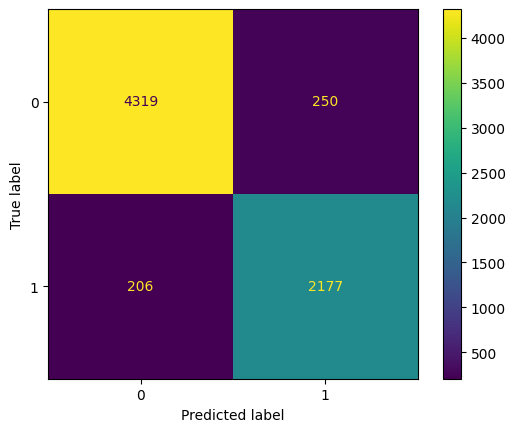

In [ ]:
# Confusion Matrix for Benchmark Model
labels = [0,1]
cm = confusion_matrix(y_test, y_pred_dtbm, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

In [ ]:
# def plot_confusionmatrix(y_train_pred_DTBM,y_train,dom):
#     print(f'{dom} Confusion matrix')
#     cf = confusion_matrix(y_train_pred_DTBM,y_train)
#     # When annot is set to True, it adds text annotations to each cell of the heatmap.
#     sns.heatmap(cf,annot=True,yticklabels=classes,xticklabels=classes,cmap='Blues', fmt='g')
#     plt.tight_layout()
#     plt.show()

In [ ]:
# #plot the confusion matrix
# classes = ['Presence','Absence']

# print(f'Train score {accuracy_score(y_train_pred_DTBM,X_train)}')
# print(f'Test score {accuracy_score(y_test_pred_DTBM,X_test)}')
# plot_confusionmatrix(y_train_pred_DTBM,X_train,dom='Train')
# plot_confusionmatrix(y_test_pred_DTBM,X_test,dom='Test')

## **MODEL 2: DECISION TREE W/ PREPROCESSING**


In [ ]:
airline_reviews_dt = pd.read_csv(file_path)
airline_reviews_dt.drop('Unnamed: 0', axis=1, inplace=True)


In [ ]:
"""
1. Drop all unnecessary columns
These are columns that are either
  a) invalid in the problem analysis context
  b) contain insights that wouldn't have an influence on the customers' Recommendation
  c) contain string/text-based insights (since we aren't using NLP or text analysis)
  d) time-sensitive (since we aren't using a time-series model)

Since inplace=True we only need to run these once
"""

airline_reviews_dt.drop('Airline Name', axis=1, inplace=True)
airline_reviews_dt.drop('Overall_Rating', axis=1, inplace=True)
airline_reviews_dt.drop('Review_Title', axis=1, inplace=True)
airline_reviews_dt.drop('Review Date', axis=1, inplace=True)
airline_reviews_dt.drop('Review', axis=1, inplace=True)
airline_reviews_dt.drop('Aircraft', axis=1, inplace=True)
airline_reviews_dt.drop('Route', axis=1, inplace=True)
airline_reviews_dt.drop('Date Flown', axis=1, inplace=True)

display(airline_reviews_dt.shape)

(23171, 11)

In [ ]:
"""
2. Drop all reviews that are not Verified
"""
airline_reviews_dt = airline_reviews_dt[airline_reviews_dt['Verified'] == True]
airline_reviews_dt.drop('Verified', axis=1, inplace=True) # Drop the column after subsetting

display(airline_reviews_dt.shape)

<ipython-input-20-cc37c740be3e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airline_reviews_dt.drop('Verified', axis=1, inplace=True) # Drop the column after subsetting


(12322, 10)

In [ ]:
"""
3. Transform null values if applicable
Many reviews will have null values in rating columns where the reviewer may
have just felt neutral (e.g. Wifi & Connectivity, Inflight Entertainment, etc)

If there is a null rating, just set it to "3.0")
"""

airline_reviews_dt['Seat Comfort'].fillna(3.0, inplace=True)
airline_reviews_dt['Cabin Staff Service'].fillna(3.0, inplace=True)
airline_reviews_dt['Food & Beverages'].fillna(3.0, inplace=True)
airline_reviews_dt['Ground Service'].fillna(3.0, inplace=True)
airline_reviews_dt['Inflight Entertainment'].fillna(3.0, inplace=True)
airline_reviews_dt['Wifi & Connectivity'].fillna(3.0, inplace=True)

display(airline_reviews_dt.shape)

<ipython-input-21-740c9ca7d1e9>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  airline_reviews_dt['Seat Comfort'].fillna(3.0, inplace=True)
<ipython-input-21-740c9ca7d1e9>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airline_reviews_dt['Seat Comfort'].fillna(3.0, inplace=True)
<ipython-input-21-740c9ca7d1e9>:10: FutureWarning: A value is

(12322, 10)

In [ ]:
"""
4. Drop all rows with null values
"""

airline_reviews_dt.dropna(inplace=True)
airline_reviews_dt.reset_index(inplace=True)

display(airline_reviews_dt.shape)

<ipython-input-22-27e7b2eaea8c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airline_reviews_dt.dropna(inplace=True)


(12320, 11)

In [ ]:
"""
5. Transform values in Recommended column as yes = 1 and no = 0

Setting these to binary values will make training our model easier.
"""

airline_reviews_dt['Recommended'] = airline_reviews_dt['Recommended'].map({'yes': 1, 'no': 0})

<ipython-input-23-5718f6bb43ef>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airline_reviews_dt['Recommended'] = airline_reviews_dt['Recommended'].map({'yes': 1, 'no': 0})


In [ ]:
"""
Transform the values in 'Type Of Traveller' column as:
'Solo Leisure': 0
'Couple Leisure': 1
'Business': 2
'Family Leisure': 3

Transform the values in 'Seat Type' column as:
'Economy Class': 0
'Business Class': 1
'Premium Economy': 2
'First Class': 3

"""

airline_reviews_dt['Type Of Traveller'] = airline_reviews_dt['Type Of Traveller'].map({
    'Solo Leisure': 0.0,
    'Couple Leisure': 1.0,
    'Business': 2.0,
    'Family Leisure': 3.0
})

airline_reviews_dt['Seat Type'] = airline_reviews_dt['Seat Type'].map({
    'Economy Class': 0.0,
    'Business Class': 1.0,
    'Premium Economy': 2.0,
    'First Class': 3.0
})

<ipython-input-24-fd4573185ebf>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airline_reviews_dt['Type Of Traveller'] = airline_reviews_dt['Type Of Traveller'].map({
<ipython-input-24-fd4573185ebf>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airline_reviews_dt['Seat Type'] = airline_reviews_dt['Seat Type'].map({


In [ ]:
"""
Evaluating post-processed dataset.
"""
airline_reviews_dt.drop('index', axis=1, inplace=True)
airline_reviews_dt.reset_index()

print('airline_reviews shape:')
display(airline_reviews_dt.shape)

print('airline_reviews head:')
display(airline_reviews_dt.head())

print('airline_reviews unique value count:')
display(airline_reviews_dt.nunique())

print('airline_reviews null value count:')
display(airline_reviews_dt.isnull().sum())

print('airline_reviews rows w/ null value count:')
display(airline_reviews_dt.isna().any(axis=1))

print('airline_reviews data types:')
display(airline_reviews_dt.dtypes)

print(f"Class Distribution: {airline_reviews_dt['Recommended'].value_counts() / len(airline_reviews_dt['Recommended'])}")

airline_reviews shape:


(12320, 10)

airline_reviews head:


,Type Of Traveller,Seat Type,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money,Recommended
0,0.0,0.0,4.0,5.0,4.0,4.0,3.0,3.0,3.0,1
1,0.0,0.0,2.0,2.0,1.0,1.0,3.0,3.0,2.0,0
2,0.0,0.0,2.0,1.0,1.0,1.0,3.0,3.0,2.0,0
3,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
4,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0


airline_reviews unique value count:


,0
Type Of Traveller,4
Seat Type,4
Seat Comfort,5
Cabin Staff Service,5
Food & Beverages,5
Ground Service,5
Inflight Entertainment,5
Wifi & Connectivity,5
Value For Money,5
Recommended,2


airline_reviews null value count:


,0
Type Of Traveller,0
Seat Type,0
Seat Comfort,0
Cabin Staff Service,0
Food & Beverages,0
Ground Service,0
Inflight Entertainment,0
Wifi & Connectivity,0
Value For Money,0
Recommended,0


airline_reviews rows w/ null value count:


,0
0,False
1,False
2,False
3,False
4,False
...,...
12315,False
12316,False
12317,False
12318,False


airline_reviews data types:


,0
Type Of Traveller,float64
Seat Type,float64
Seat Comfort,float64
Cabin Staff Service,float64
Food & Beverages,float64
Ground Service,float64
Inflight Entertainment,float64
Wifi & Connectivity,float64
Value For Money,float64
Recommended,int64


Class Distribution: Recommended
0    0.695536
1    0.304464
Name: count, dtype: float64


In [ ]:
"""
Train Test Split
SMOTE
"""
# Assign values to X and y
X2 = airline_reviews_dt.drop('Recommended', axis=1)
y2 = airline_reviews_dt['Recommended']

# Split the data into 70% training and 30% testing sets
X_train2,X_test2,y_train2,y_test2 = train_test_split(X2, y2, test_size = 0.3, random_state = 42)

# Apply SMOTE only to the training set
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy=0.7, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train2, y_train2)

# Seeing resampled class distribution after SMOTE
resampled_class_counts = y_train_resampled.value_counts() / len(y_train_resampled)
print(f"Class Distribution: {resampled_class_counts}")

Class Distribution: Recommended
0    0.588264
1    0.411736
Name: count, dtype: float64


In [ ]:
"""
Decision Tree Classifier
Hyperparameter Tuning
"""
# Run Decision Tree Classifier
dt_model = tree.DecisionTreeClassifier(random_state=42)

# Hyperparameter Tuning
dt_param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_split': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
}

dt_grid_search = GridSearchCV(estimator= dt_model,
                              param_grid= dt_param_grid,
                              cv=10,
                              scoring='accuracy')
dt_grid_search.fit(X_train_resampled, y_train_resampled)

# Results for Decision Tree
print("Best Parameters for Decision Tree:")
print(dt_grid_search.best_params_)
print("\nDecision Tree Classification Report:")
dt_best_model = dt_grid_search.best_estimator_
y_pred_dt = dt_best_model.predict(X_test2)
print(classification_report(y_test2, y_pred_dt))

# dt_model.fit(X_train_resampled,y_train_resampled)

y_train_pred_dt = dt_best_model.predict(X_train2)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
3000 fits failed out of a total of 30000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3000 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/

Best Parameters for Decision Tree:
{'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 2}

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      2604
           1       0.89      0.92      0.91      1092

    accuracy                           0.94      3696
   macro avg       0.93      0.94      0.93      3696
weighted avg       0.95      0.94      0.95      3696



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:1103: UserWarning: One or more of the test scores are non-finite: [       nan 0.93126233 0.93126233 ... 0.95078895 0.95078895 0.95078895]
  warnings.warn(


In [ ]:
"""
Evaluating the Model
"""

train_accuracy2 = accuracy_score(y_train2, y_train_pred_dt)
test_accuracy2 = accuracy_score(y_test2, y_pred_dt)
f1 = f1_score(y_pred_dt, y_test2, average='weighted')

print('Train Accuracy:', train_accuracy2)
print("Test Accuracy:", test_accuracy2)
print("F1 Score:", f1)

# Stratified Accuracy
stratified_cv = StratifiedKFold(n_splits= 10, shuffle= True, random_state= 42)

stratified_scores = cross_val_score(dt_best_model, X_train_resampled, y_train_resampled, cv=stratified_cv, scoring='accuracy')

print('Cross-validated Stratified Score (Accuracy):', np.mean(stratified_scores))

Train Accuracy: 0.9592996289424861
Test Accuracy: 0.9448051948051948
F1 Score: 0.9445360756025866
Cross-validated Stratified Score (Accuracy): 0.9541420118343196


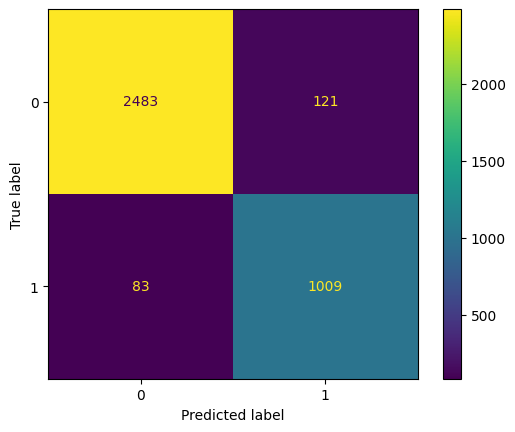

In [ ]:
labels = [0,1]
cm = confusion_matrix(y_test2, y_pred_dt, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

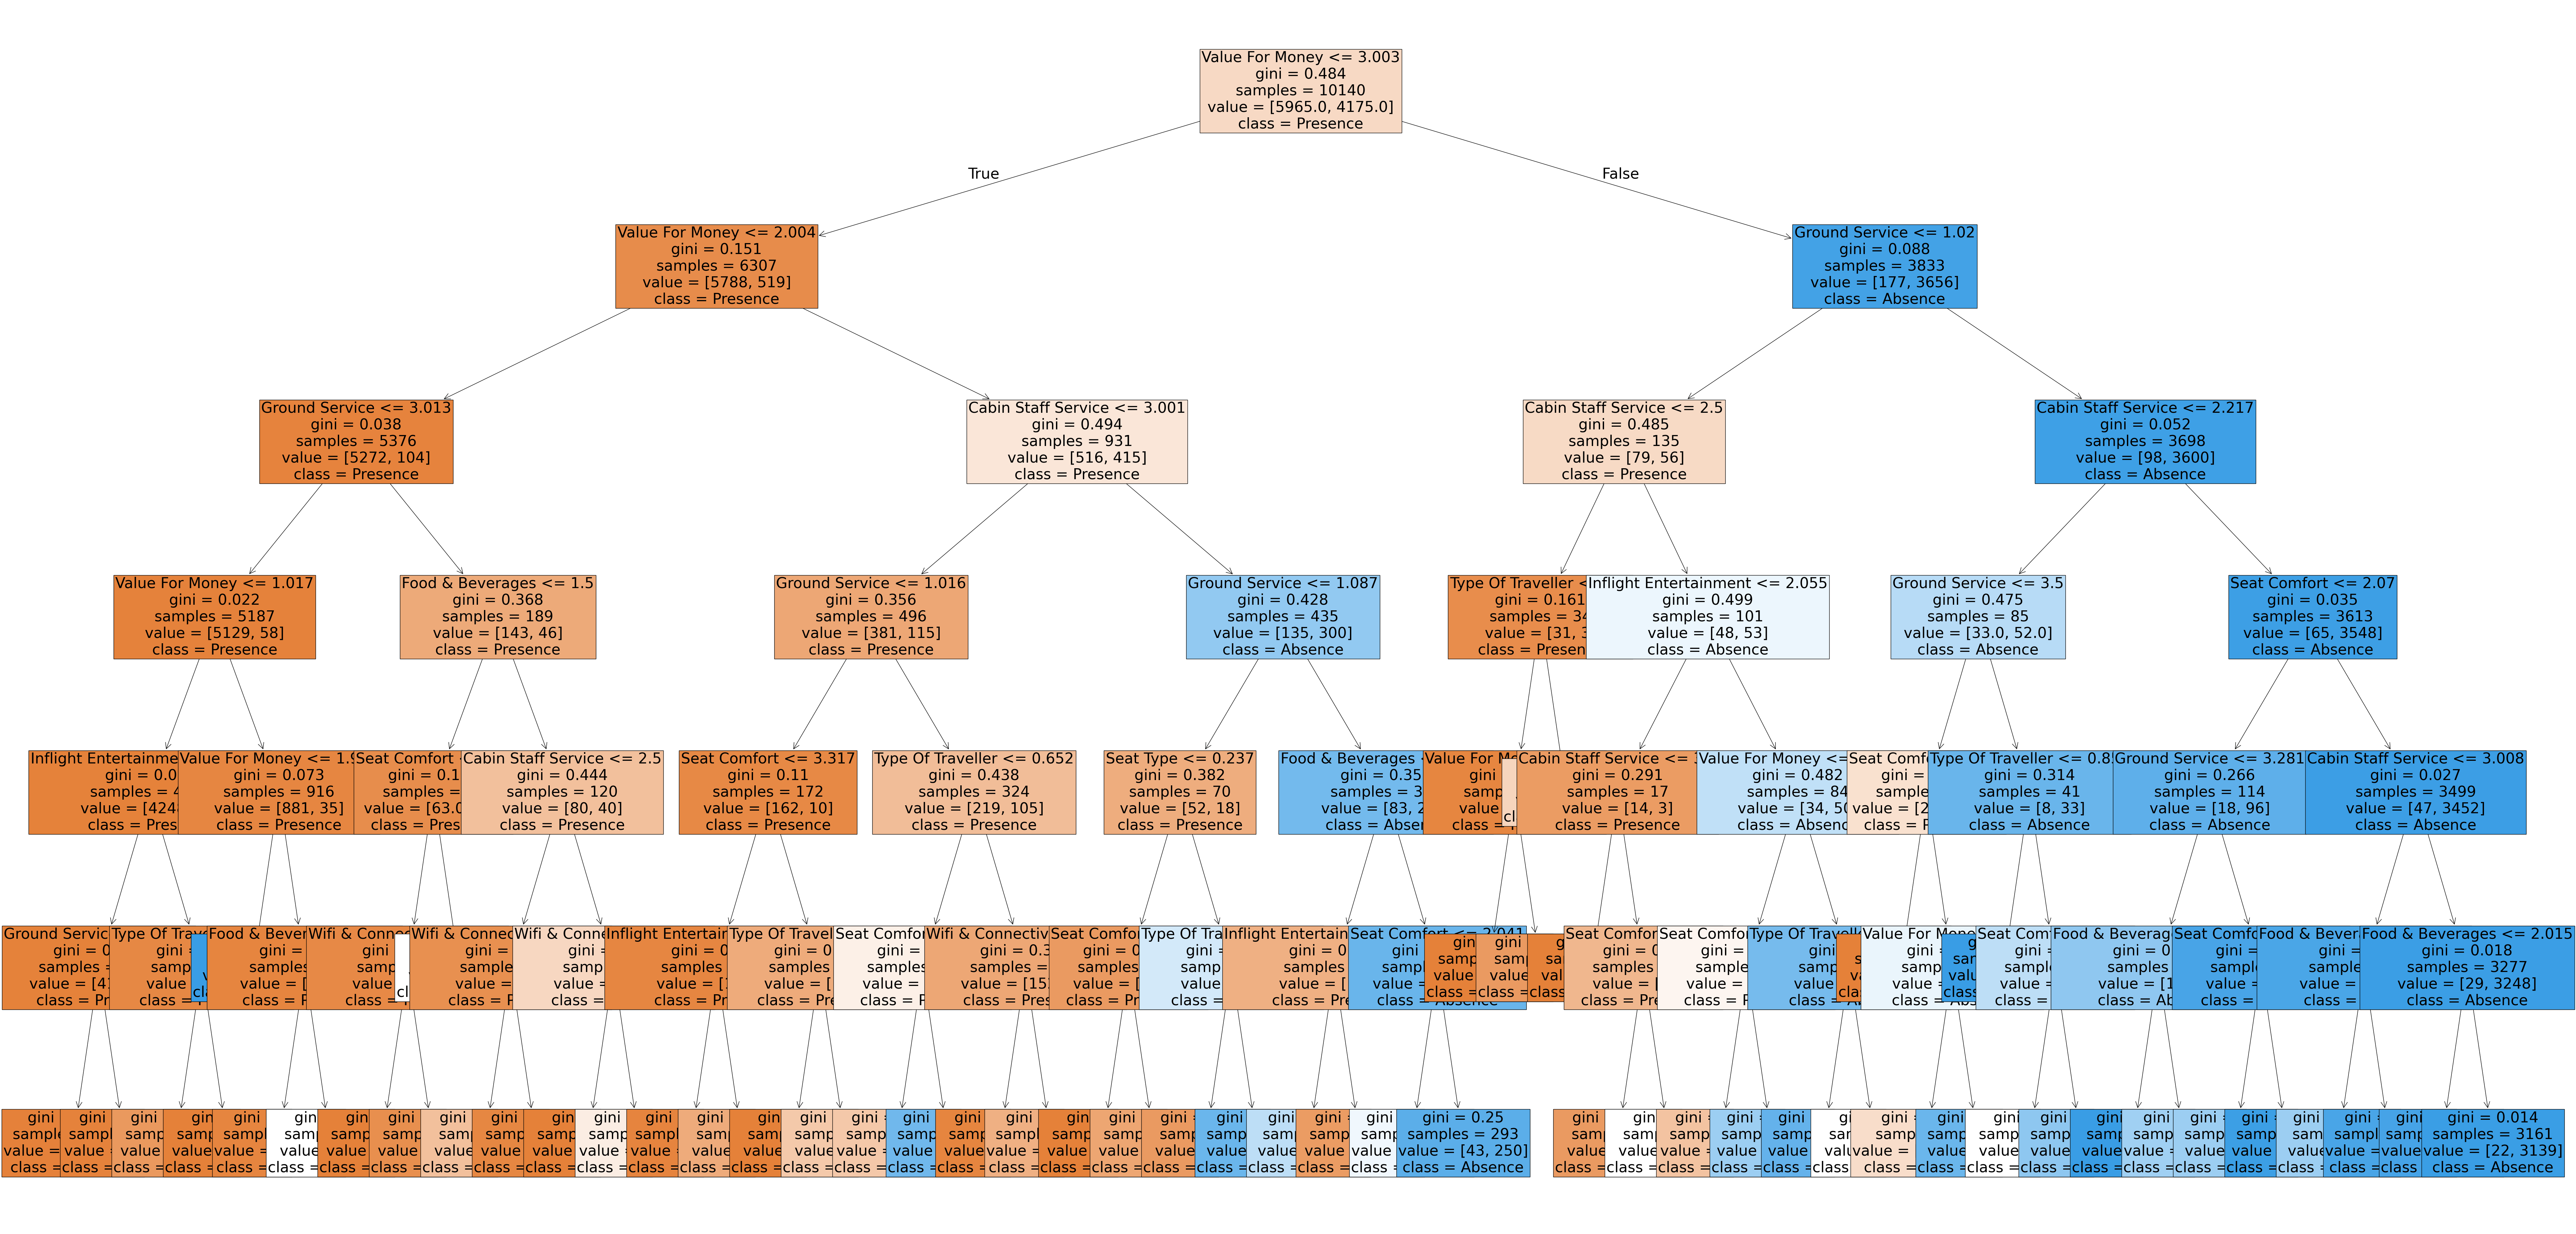

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(96,48), dpi=100)
features = airline_reviews_dt.columns
classes = ['Presence','Absence']

tree.plot_tree(dt_best_model,ax=ax,feature_names=features,class_names=classes, filled=True, fontsize=32)
plt.show()

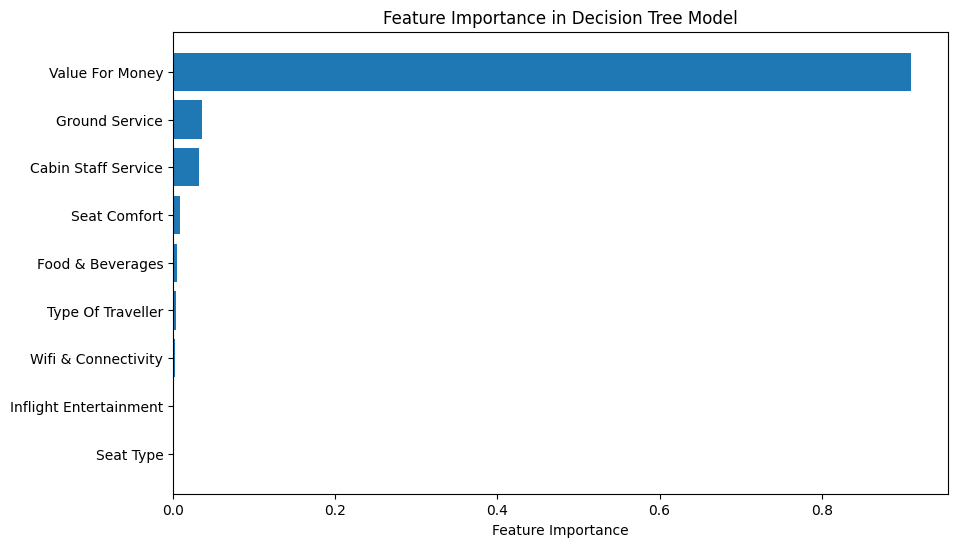

In [ ]:
# plotting feature importance
# Get the feature importances from the Decision Tree model
importances = dt_best_model.feature_importances_

importance_df = pd.DataFrame({
    'Feature': airline_reviews_dt.columns[:-1],  # Exclude the target column
    'Importance': importances
})

# Sort by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

#Plot the feature importances
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Decision Tree Model')
plt.gca().invert_yaxis()  # Invert y-axis to show most important features at the top
plt.show()

In [ ]:
display(importance_df)

,Feature,Importance
8,Value For Money,0.910149
5,Ground Service,0.036319
3,Cabin Staff Service,0.031605
2,Seat Comfort,0.008192
4,Food & Beverages,0.004919
0,Type Of Traveller,0.004294
7,Wifi & Connectivity,0.001924
6,Inflight Entertainment,0.001704
1,Seat Type,0.000895
